# Gravitationally-induced transparency: Full solution assuming a linear gravitational interaction and the rotating wave approximation.

This notebook reproduces the results reported in the paper *Can gravity mediate the transmission of quantum information?* and in particular the full solution of the dynamics discussed in *Appendix A*.

## Theoretical model with rotating-wave approxmation

The Hamiltonian of the global system is :

$$
\begin{array}{ll}
H  =&  \hbar \Delta a_1^\dagger a_1 + \hbar \omega_{B} b_1^\dagger b_1 + \hbar \Delta a_2^\dagger a_2 + \hbar \omega_{B} b_2^\dagger b_2 & \text{(free modes)}\\
   &+ \hbar g (a_1 + a_1^\dagger) (b_1 + b_1^\dagger) + \hbar g (a_2 + a_2^\dagger) (b_2 + b_2^\dagger) & \text{(optomechanical interaction)}\\
   & + \hbar \lambda (b_1 + b_1^\dagger) (b_2 + b_2^\dagger) & \text{(gravitational interaction)} \\
  &+ H_{\rm env\, A_1} + H_{\rm env\, B_1} + H_{\rm env\, A_2} + H_{\rm env\, B_2} &  \text{(optical and mechanical environments)}  \\
\end{array}
$$

We now go in interaction picure with respect to 

$$H_0= \hbar \Delta a_1^\dagger a_1 + \hbar \omega_{B} b_1^\dagger b_1 +  \hbar \Delta a_2^\dagger a_2 + \hbar \omega_{B} b_2^\dagger b_2.
$$

In this reference, the bosonic operators are multiplied by a rotating complex phase:
        
$$a_j \rightarrow   e^{i \Delta t} a_j(t), \quad b_j \rightarrow  e^{i \omega_{B} t} b_j(t).$$

We are interested in enhancing *beam-splitter-like* interactions between the modes. Thus, we assume the following resonance condition:

$$
\Delta= \omega_B.
$$

In this regime, ignoring all terms rotating with frequency $2 \omega_B$  (*rotating wave approximation*), the interaction Hamiltonian simplifies to:


$$
\begin{array}{ll}
H_I  =&  \hbar g(a_1 b_1^\dagger + a_1^\dagger b_1 ) + \hbar g(a_2 b_2^\dagger + a_2^\dagger b_2 )+ \hbar \lambda (b_1  b_2^\dagger  + b_1^\dagger b_2) \\
  &+ H'_{\rm env\, A_1} + H'_{\rm env\, B_1} + H'_{\rm env\, A_2} + H'_{\rm env\, B_2}\\
\end{array}
$$

The open dynamics can be described by a system of quantum Langevin equations:


$$
\frac{d{\mathbf r}}{dt} = A {\bf r}(t) + B {\bf w}(t),
$$



where ${\bf r}=(a_1, b_1, a_2, b_2)^\top$ and ${\bf w}=(a_{1_{\rm in}}, b_{1_{\rm in}}, a_{2_{\rm in}}, b_{2_{\rm in}})^\top$  are two vectors containing the system operators and the noise operators respectively and where

$$
A = - \begin{pmatrix}
\frac{\kappa}{2} & i g & 0 & 0\\
i g & \frac{\gamma}{2} & 0 & i \lambda \\
0& 0 &  \frac{\kappa}{2} & i g \\
0& i \lambda &  i g  & \frac{\gamma}{2}
\end{pmatrix},
\quad B = \text{diag}(\sqrt{\kappa}, \sqrt{\gamma},\sqrt{\kappa},\sqrt{\gamma}).
$$
In the above matrices, we introduced the optical and mechanical damping rates, respectively represented as $\kappa$ and $\gamma$.

We assume white and Markovian noise, characterized by the following correlation functions:
$$
\langle {\bf w^\dagger}(t) {\bf w} (t')^\top \rangle = D \, \delta(t -t'),
$$
where
$$
D =\text{diag}(0, N_T, 0, N_T)^\top,
$$
where $N_T$ is the mean occupation number of the mechanical thermal bath, i.e., $N_T = [\exp(\hbar \omega_B/k_B T) - 1]^{-1}$. 

### Mapping the theoretical model to SymPy objects

In [1]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

omega = sp.symbols("omega", real=True)
lam, g, kappa, gamma, N_T = sp.symbols("lambda, g, kappa, gamma, N_{T}", real=True, positive=True)

In [2]:
A = - sp.Matrix([[kappa / sp.S(2), sp.I * g, 0, 0], 
                [sp.I * g, + gamma /  sp.S(2), 0, sp.I * lam],
                [0, 0,  kappa /  sp.S(2), sp.I * g], 
                [0, sp.I * lam,  sp.I * g, gamma / sp.S(2)]]
) 

In [3]:
B = sp.diag(sp.sqrt(kappa), sp.sqrt(gamma), sp.sqrt(kappa), sp.sqrt(gamma))

In [4]:
A

Matrix([
[-kappa/2,      -I*g,        0,         0],
[    -I*g,  -gamma/2,        0, -I*lambda],
[       0,         0, -kappa/2,      -I*g],
[       0, -I*lambda,     -I*g,  -gamma/2]])

In [5]:
B

Matrix([
[sqrt(kappa),           0,           0,           0],
[          0, sqrt(gamma),           0,           0],
[          0,           0, sqrt(kappa),           0],
[          0,           0,           0, sqrt(gamma)]])

## Solution in frequency domain

Let us define the Fourier transform of ${\bf r}(t)$ and ${\bf w}(t)$:

$$
{\bf x}(\omega) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty} dt e^{i \omega t} {\bf x}(t), \qquad  {\bf x} =  {\bf r}, {\bf w}.
$$
The correlation matrix of the noise vector in frequency space is:
$$
\langle {\bf w}(\omega) {\bf w}^T(\omega') \rangle = D \, \delta(\omega + \omega') .
$$
We can now transform the initial differential equation from the time domain to the frequency domain obtaining:
$$ -i \omega\, {\bf r}(\omega) = A {\bf r}(\omega) + B  {\bf w}(\omega). $$
Neglecting the initial transient solution, in the steady-state regime, we have: 
$${\bf r}(\omega) = -(i \omega + A)^{-1}B{\bf w}(\omega).$$

Defining
$$ T(\omega) := - (i \omega + A)^{-1} B, $$
we have:
$$
{\bf r}(\omega) = T(\omega){\bf w}(\omega).
$$


In [6]:
G = sp.I * omega * sp.eye(4) + A

G_inv = G.inv()
G_inv

Matrix([
[(-8*g**2*gamma + 16*I*g**2*omega - 2*gamma**2*kappa + 4*I*gamma**2*omega + 8*I*gamma*kappa*omega + 16*gamma*omega**2 - 8*kappa*lambda**2 + 8*kappa*omega**2 + 16*I*lambda**2*omega - 16*I*omega**3)/(16*g**4 + 8*g**2*gamma*kappa - 16*I*g**2*gamma*omega - 16*I*g**2*kappa*omega - 32*g**2*omega**2 + gamma**2*kappa**2 - 4*I*gamma**2*kappa*omega - 4*gamma**2*omega**2 - 4*I*gamma*kappa**2*omega - 16*gamma*kappa*omega**2 + 16*I*gamma*omega**3 + 4*kappa**2*lambda**2 - 4*kappa**2*omega**2 - 16*I*kappa*lambda**2*omega + 16*I*kappa*omega**3 - 16*lambda**2*omega**2 + 16*omega**4),                                                                    (16*I*g**3 + 4*I*g*gamma*kappa + 8*g*gamma*omega + 8*g*kappa*omega - 16*I*g*omega**2)/(16*g**4 + 8*g**2*gamma*kappa - 16*I*g**2*gamma*omega - 16*I*g**2*kappa*omega - 32*g**2*omega**2 + gamma**2*kappa**2 - 4*I*gamma**2*kappa*omega - 4*gamma**2*omega**2 - 4*I*gamma*kappa**2*omega - 16*gamma*kappa*omega**2 + 16*I*gamma*omega**3 + 4*kappa**2*lambda**2 

In [7]:
G_inv = sp.simplify(G_inv)

In [8]:
T = - G_inv @ B
T

Matrix([
[-2*sqrt(kappa)*(4*g**2*gamma - 8*I*g**2*omega + gamma**2*kappa - 2*I*gamma**2*omega - 4*I*gamma*kappa*omega - 8*gamma*omega**2 + 4*kappa*lambda**2 - 4*kappa*omega**2 - 8*I*lambda**2*omega + 8*I*omega**3)/(-16*g**4 - 8*g**2*gamma*kappa + 16*I*g**2*gamma*omega + 16*I*g**2*kappa*omega + 32*g**2*omega**2 - gamma**2*kappa**2 + 4*I*gamma**2*kappa*omega + 4*gamma**2*omega**2 + 4*I*gamma*kappa**2*omega + 16*gamma*kappa*omega**2 - 16*I*gamma*omega**3 - 4*kappa**2*lambda**2 + 4*kappa**2*omega**2 + 16*I*kappa*lambda**2*omega - 16*I*kappa*omega**3 + 16*lambda**2*omega**2 - 16*omega**4),                                                                       -4*g*sqrt(gamma)*(-4*I*g**2 - I*gamma*kappa - 2*gamma*omega - 2*kappa*omega + 4*I*omega**2)/(-16*g**4 - 8*g**2*gamma*kappa + 16*I*g**2*gamma*omega + 16*I*g**2*kappa*omega + 32*g**2*omega**2 - gamma**2*kappa**2 + 4*I*gamma**2*kappa*omega + 4*gamma**2*omega**2 + 4*I*gamma*kappa**2*omega + 16*gamma*kappa*omega**2 - 16*I*gamma*omega**3 - 4*

## Explicit solution for $a_2(\omega)$

From the above general solution, we can extract the explicit expression for the Fourier transform of the intracavity mode of the second cavity $a_2(\omega)$. Thanks to the linearity of the system, this is given by:

$$
a_2(\omega) = \tilde \alpha_1 a_{1_{\rm in}} + \tilde \beta_1 b_{1_{\rm in}} +\tilde \alpha_2 a_{2_{\rm in}} +\tilde \beta_2 b_{2_{\rm in}} ,
$$

where the coefficients $\tilde \alpha_j$ and $\tilde \beta_j$ can be easily identified as specific matrix elements of $T(\omega)$.

In [9]:
alpha_1_tilde = T[2, 0]
beta_1_tilde = T[2, 1]
alpha_2_tilde = T[2, 2]
beta_2_tilde = T[2, 3]

In [10]:
import IPython.display as disp  # Used to print in LaTeX form SymPy objects
 
disp.display(alpha_1_tilde)
disp.display(beta_1_tilde)
disp.display(alpha_2_tilde)
disp.display(beta_2_tilde)

-16*I*g**2*sqrt(kappa)*lambda/(-16*g**4 - 8*g**2*gamma*kappa + 16*I*g**2*gamma*omega + 16*I*g**2*kappa*omega + 32*g**2*omega**2 - gamma**2*kappa**2 + 4*I*gamma**2*kappa*omega + 4*gamma**2*omega**2 + 4*I*gamma*kappa**2*omega + 16*gamma*kappa*omega**2 - 16*I*gamma*omega**3 - 4*kappa**2*lambda**2 + 4*kappa**2*omega**2 + 16*I*kappa*lambda**2*omega - 16*I*kappa*omega**3 + 16*lambda**2*omega**2 - 16*omega**4)

-8*g*sqrt(gamma)*lambda*(-kappa + 2*I*omega)/(-16*g**4 - 8*g**2*gamma*kappa + 16*I*g**2*gamma*omega + 16*I*g**2*kappa*omega + 32*g**2*omega**2 - gamma**2*kappa**2 + 4*I*gamma**2*kappa*omega + 4*gamma**2*omega**2 + 4*I*gamma*kappa**2*omega + 16*gamma*kappa*omega**2 - 16*I*gamma*omega**3 - 4*kappa**2*lambda**2 + 4*kappa**2*omega**2 + 16*I*kappa*lambda**2*omega - 16*I*kappa*omega**3 + 16*lambda**2*omega**2 - 16*omega**4)

-2*sqrt(kappa)*(4*g**2*gamma - 8*I*g**2*omega + gamma**2*kappa - 2*I*gamma**2*omega - 4*I*gamma*kappa*omega - 8*gamma*omega**2 + 4*kappa*lambda**2 - 4*kappa*omega**2 - 8*I*lambda**2*omega + 8*I*omega**3)/(-16*g**4 - 8*g**2*gamma*kappa + 16*I*g**2*gamma*omega + 16*I*g**2*kappa*omega + 32*g**2*omega**2 - gamma**2*kappa**2 + 4*I*gamma**2*kappa*omega + 4*gamma**2*omega**2 + 4*I*gamma*kappa**2*omega + 16*gamma*kappa*omega**2 - 16*I*gamma*omega**3 - 4*kappa**2*lambda**2 + 4*kappa**2*omega**2 + 16*I*kappa*lambda**2*omega - 16*I*kappa*omega**3 + 16*lambda**2*omega**2 - 16*omega**4)

-4*g*sqrt(gamma)*(-4*I*g**2 - I*gamma*kappa - 2*gamma*omega - 2*kappa*omega + 4*I*omega**2)/(-16*g**4 - 8*g**2*gamma*kappa + 16*I*g**2*gamma*omega + 16*I*g**2*kappa*omega + 32*g**2*omega**2 - gamma**2*kappa**2 + 4*I*gamma**2*kappa*omega + 4*gamma**2*omega**2 + 4*I*gamma*kappa**2*omega + 16*gamma*kappa*omega**2 - 16*I*gamma*omega**3 - 4*kappa**2*lambda**2 + 4*kappa**2*omega**2 + 16*I*kappa*lambda**2*omega - 16*I*kappa*omega**3 + 16*lambda**2*omega**2 - 16*omega**4)

We see that the denominator is the same for all the coefficients and it is related to the determinant of the $G$ matrix. Indeed if we factorize $1/\det G$ we get:

$$
a_2(\omega) = \frac{1}{\det G} [\tilde \alpha_1' a_{1_{\rm in}} + \tilde \beta_1' b_{1_{\rm in}} + \tilde \alpha_2' a_{2_{\rm in}} +\tilde  \beta_2' b_{2_{\rm in}} ]
$$

where new coefficients are given by the following more compact expressions:

In [11]:
det_G = sp.det(G)

In [12]:
alpha_1_tilde_p = sp.simplify(alpha_1_tilde * det_G)
alpha_1_tilde_p

I*g**2*sqrt(kappa)*lambda

In [13]:
beta_1_tilde_p = sp.simplify(beta_1_tilde * det_G)
beta_1_tilde_p

g*sqrt(gamma)*lambda*(-kappa + 2*I*omega)/2

In [14]:
alpha_2_tilde_p = sp.simplify(alpha_2_tilde * det_G)
alpha_2_tilde_p

sqrt(kappa)*(g**2*gamma/2 - I*g**2*omega + gamma**2*kappa/8 - I*gamma**2*omega/4 - I*gamma*kappa*omega/2 - gamma*omega**2 + kappa*lambda**2/2 - kappa*omega**2/2 - I*lambda**2*omega + I*omega**3)

In [15]:
beta_2_tilde_p = sp.simplify(beta_2_tilde * det_G)
beta_2_tilde_p

g*sqrt(gamma)*(-4*I*g**2 - I*gamma*kappa - 2*gamma*omega - 2*kappa*omega + 4*I*omega**2)/4

## Explicit solution for $a_{2_{\rm out}}(\omega)$

We now focus on the output of the cavity mode $a_2$, i.e., $a_{2_{\rm out}}$. 
So we look for the complex coefficients $\alpha_j$ and $\beta_j$ in the following formula:

$$
a_{2_{\rm out}}(\omega) = \alpha_1 a_{1_{\rm in}} + \beta_1 b_{1_{\rm in}} + \alpha_2 a_{2_{\rm in}} + \beta_2 b_{2_{\rm in}} 
$$
In the previous section we evaluated a similar expression for the intracavity mode:
$$
a_2(\omega) = \tilde \alpha_1 a_{1_{\rm in}} + \tilde \beta_1 b_{1_{\rm in}} + \tilde \alpha_2 a_{2_{\rm in}} + \tilde \beta_2 b_{2_{\rm in}} 
$$

Using the standard input-output relation for quantum optical cavities 
$$a_{2_{\rm out}}(\omega) = \sqrt{\kappa_{2}}a_2(\omega) - a_{2_{\rm in}},$$

we have:

$$ 
\alpha_1 = \sqrt{\kappa_{2}} \tilde \alpha_1 \quad
\beta_1 = \sqrt{\kappa_{2}} \tilde \beta_1 \quad
\alpha_2 =  \sqrt{\kappa_{2}} \tilde \alpha_2 -1 \quad
\beta_1 = \sqrt{\kappa_{2}} \tilde \beta_1'
$$

In [16]:
alpha_1 = sp.sqrt(kappa) * alpha_1_tilde
beta_1 = sp.sqrt(kappa) * beta_1_tilde
alpha_2 = sp.sqrt(kappa) * alpha_2_tilde - 1
beta_2 = sp.sqrt(kappa) * beta_2_tilde

Factorizing $1/\det G$, we get:

$$
a_{2_{\rm out}}(\omega) = \frac{1}{\det G} [ \alpha_1' a_{1_{\rm in}} + \beta_1' b_{1_{\rm in}} + \alpha_2' a_{2_{\rm in}} + \beta_2' b_{2_{\rm in}} ]
$$

where new coefficients are given by the following more compact expressions:

In [17]:
alpha_1_p = sp.simplify(alpha_1 * det_G)
alpha_1_p

I*g**2*kappa*lambda

In [18]:
beta_1_p = sp.simplify(beta_1 * det_G )
beta_1_p

g*sqrt(gamma)*sqrt(kappa)*lambda*(-kappa + 2*I*omega)/2

In [19]:
alpha_2_p = sp.simplify(alpha_2 * det_G)
alpha_2_p

-g**4 + I*g**2*gamma*omega + 2*g**2*omega**2 + gamma**2*kappa**2/16 + gamma**2*omega**2/4 - I*gamma*kappa**2*omega/4 - I*gamma*omega**3 + kappa**2*lambda**2/4 - kappa**2*omega**2/4 + lambda**2*omega**2 - omega**4

In [20]:
beta_2_p = sp.simplify(beta_2 * det_G)
beta_2_p

g*sqrt(gamma)*sqrt(kappa)*(-4*I*g**2 - I*gamma*kappa - 2*gamma*omega - 2*kappa*omega + 4*I*omega**2)/4

The annihilation operator $a_{2_{\rm out}}(\omega)$ represents well defined physical quantum mode. So it must obey the canonical commutation relations
$[a_{2_{\rm out}}(\omega), a_{2_{\rm out}}^\dagger(\omega')]=\delta(\omega + \omega').$
Let's verify this is the indeed the case:

In [21]:
assert sp.simplify(sp.Abs(alpha_1)**2 + sp.Abs(beta_1)**2 + sp.Abs(alpha_2)**2 + sp.Abs(beta_2)**2) == 1

## The gravity-mediated quantum channel is a Gaussian phase-insensitive attenuator.
In the previous section we obtained al the coefficients in the following formula:
$$
a_{2_{\rm out}}(\omega) = \alpha_1 a_{1_{\rm in}}(\omega) + \beta_1 b_{1_{\rm in}}(\omega) + \alpha_2 a_{2_{\rm in}}(\omega) + \beta_2 b_{2_{\rm in}}(\omega). 
$$
Now, if we consider the optical input mode $a_{1_{\rm in}}$ as an "input signal" and all the remaining terms as environmental "noise", we can model the overall transmission from $a_{1_{in}}$ to $a_{2_{out}}$ as a quantum optical Gaussian channel. More precisely, since $|\alpha_1|^2\le 1$ (see above code cell), we obtain the so-called phase-insensitive quantum attenuator (up to an irrelevant phase space rotation)

$$\rho_{\rm out} = \mathcal{E}_{\eta, N}(\rho_{\rm in}),$$
which is completely characterized by the following two parameters
$$
\eta(\omega)= |\alpha_1|^2, \qquad N(\omega)= (|\beta_1|^2 + |\beta_2|^2) N_{T}/(1 - \eta),
$$
corresponding to the transmissivity and the environmental mean occupation number respectively.

In the Heisenberg picture, the channel acts as a "beam splitter" mixing the input signal with an effective environmental mode $a^E(\omega)$:

$$
a_{2_{\rm out}}(\omega) = \sqrt{\eta(\omega)} e^{i \varphi }a_{1_{\rm in}}(\omega) + \sqrt{1 - \eta(\omega}) a^E(\omega),
$$

where
$$
a^E(\omega) = \frac{\beta_1 b_{1_{\rm in}}(\omega) + \alpha_2 a_{2_{\rm in}}(\omega) + \beta_2 b_{2_{\rm in}}(\omega)}{|\beta_1|^2 + |\beta_2|^2 + |\alpha_2|^2} =
\frac{\beta_1 b_{1_{\rm in}}(\omega) + \alpha_2 a_{2_{\rm in}}(\omega) + \beta_2 b_{2_{\rm in}}(\omega)}
{1 - |\alpha_1|^2} = 
\frac{\beta_1 b_{1_{\rm in}}(\omega) + \alpha_2 a_{2_{\rm in}}(\omega) + \beta_2 b_{2_{\rm in}}(\omega)}
{1 - \eta(\omega)}
$$
and
$$
[a^E(\omega), (a^{E}(\omega'))^\dagger] = \delta(\omega - \omega') \qquad 
\langle (a^E(\omega))^\dagger, a^{E}(\omega')\rangle =  N(\omega) \delta(\omega - \omega') , 
\qquad N(\omega)=\frac{(|\beta_1|^2 +|\beta_2|^2) N_T}{1 - \eta(\omega)} \qquad e^{i \varphi }=\frac{\alpha_1}{|\alpha_1|}.
$$

In what follows we are going to neglect the phase-space rotation factor $e^{i \varphi }$ since it can be absorbed as a change of reference frame for the input mode or for the output mode and, therefore, it is irrelevant with respect to non-classical properties of the channel discussed in the next section.




## Is the gravity-mediated attenuator channel "classical" or "quantum"?


To answer this question we use concepts and methods from the field of quantum information theory. 

#### Entanglement-breaking criterion

A standard criterion to identify "classical" channels is given by the notion of *entanglement breaking channels* [1][2][3].

**Definition** (Entanglement breaking channel): *If channel $\Phi$ is said to be entanglement-breaking if, when applied to a subsystem of any entangled state, the result is always a separable state. More explicitly:*

$$
\Phi \;\text{is entanglement-breaking} \Longleftrightarrow   ( \mathcal I \otimes  \Phi) (\rho_{\rm in})\; \text{is separable for any } \rho_{\rm in}.
$$


**Property**: A channel is entanglement breaking if and only if it can be implemented with local operations and classical communications (LOCC). [1][2][3].


**Therefore, experimentally certifying that the quantum optical channel from $a_{1_{\rm in}}(\omega)$ to $a_{2_{\rm out}}(\omega)$ is not entanglement breaking, would imply that gravity is a non-classical mediator of quantum information. By "non-classical", we mean that the action of gravity on the two subsystems cannot be described by LOCC.**


It is known that a noisy quantum limited attenuator $\rho_{\rm out} = \mathcal{E}_{\eta, N}(\rho_{\rm in})$ is entanglement breaking if and only if [3][4]:

$$
 \frac{\eta}{N (1 - \eta)} \le 1.
$$

In the notation of this notebook, the condition becomes:

$$
\frac{|\alpha_1|^2}{(|\beta_1|^2 +|\beta_2|^2) N_T} \le 1.
$$


In [64]:
noise = sp.simplify((sp.Abs(beta_1)**2 + sp.Abs(beta_2)**2) * N_T)
transmissivity = sp.simplify(sp.Abs(alpha_1)**2)

In [65]:
sp.simplify((transmissivity))

256*g**4*kappa**2*lambda**2/(256*g**8 + 256*g**6*gamma*kappa - 1024*g**6*omega**2 + 96*g**4*gamma**2*kappa**2 + 128*g**4*gamma**2*omega**2 - 512*g**4*gamma*kappa*omega**2 + 128*g**4*kappa**2*lambda**2 + 128*g**4*kappa**2*omega**2 - 512*g**4*lambda**2*omega**2 + 1536*g**4*omega**4 + 16*g**2*gamma**3*kappa**3 + 64*g**2*gamma**3*kappa*omega**2 - 64*g**2*gamma**2*kappa**2*omega**2 - 256*g**2*gamma**2*omega**4 + 64*g**2*gamma*kappa**3*lambda**2 + 64*g**2*gamma*kappa**3*omega**2 + 256*g**2*gamma*kappa*lambda**2*omega**2 + 256*g**2*gamma*kappa*omega**4 + 256*g**2*kappa**2*lambda**2*omega**2 - 256*g**2*kappa**2*omega**4 + 1024*g**2*lambda**2*omega**4 - 1024*g**2*omega**6 + gamma**4*kappa**4 + 8*gamma**4*kappa**2*omega**2 + 16*gamma**4*omega**4 + 8*gamma**2*kappa**4*lambda**2 + 8*gamma**2*kappa**4*omega**2 + 64*gamma**2*kappa**2*lambda**2*omega**2 + 64*gamma**2*kappa**2*omega**4 + 128*gamma**2*lambda**2*omega**4 + 128*gamma**2*omega**6 + 16*kappa**4*lambda**4 - 32*kappa**4*lambda**2*omega**2 + 

In [66]:
sp.simplify((noise))

16*N_{T}*g**2*gamma*kappa*(16*g**4 + 8*g**2*gamma*kappa - 32*g**2*omega**2 + gamma**2*kappa**2 + 4*gamma**2*omega**2 + 4*kappa**2*omega**2 + 4*lambda**2*(kappa**2 + 4*omega**2) + 16*omega**4)/(256*g**8 + 256*g**6*gamma*kappa - 1024*g**6*omega**2 + 96*g**4*gamma**2*kappa**2 + 128*g**4*gamma**2*omega**2 - 512*g**4*gamma*kappa*omega**2 + 128*g**4*kappa**2*lambda**2 + 128*g**4*kappa**2*omega**2 - 512*g**4*lambda**2*omega**2 + 1536*g**4*omega**4 + 16*g**2*gamma**3*kappa**3 + 64*g**2*gamma**3*kappa*omega**2 - 64*g**2*gamma**2*kappa**2*omega**2 - 256*g**2*gamma**2*omega**4 + 64*g**2*gamma*kappa**3*lambda**2 + 64*g**2*gamma*kappa**3*omega**2 + 256*g**2*gamma*kappa*lambda**2*omega**2 + 256*g**2*gamma*kappa*omega**4 + 256*g**2*kappa**2*lambda**2*omega**2 - 256*g**2*kappa**2*omega**4 + 1024*g**2*lambda**2*omega**4 - 1024*g**2*omega**6 + gamma**4*kappa**4 + 8*gamma**4*kappa**2*omega**2 + 16*gamma**4*omega**4 + 8*gamma**2*kappa**4*lambda**2 + 8*gamma**2*kappa**4*omega**2 + 64*gamma**2*kappa**2*lamb

In [67]:
general_ratio = sp.simplify((transmissivity/noise))
general_ratio

16*g**2*kappa*lambda**2/(N_{T}*gamma*(16*g**4 + 8*g**2*gamma*kappa - 32*g**2*omega**2 + gamma**2*kappa**2 + 4*gamma**2*omega**2 + 4*kappa**2*omega**2 + 4*lambda**2*(kappa**2 + 4*omega**2) + 16*omega**4))

When the above expression is larger than 1, the gravity-induced channel is non-classical.

## Analytical solution at $\omega=0$

We guess that the optimal frequency is the cavity resonance frequency which, in interaction picture, is $\omega=0$.  
So we try maximize the transmissivity-to-noise ratio at $\omega=0$.

In [68]:
ratio = sp.simplify((transmissivity/noise).subs(omega, 0))
ratio    

16*g**2*kappa*lambda**2/(N_{T}*gamma*(16*g**4 + 8*g**2*gamma*kappa + gamma**2*kappa**2 + 4*kappa**2*lambda**2))

We optimize with respect to the optomechanical coupling constant $g$.

In [71]:
g_opt = sp.solve(sp.simplify(sp.derive_by_array(ratio, g)), g)
g_opt[0] 

sqrt(kappa)*(gamma**2 + 4*lambda**2)**(1/4)/2

In [72]:
ratio_opt = sp.simplify(ratio.subs(g, g_opt[0]))
ratio_opt

2*lambda**2*sqrt(gamma**2 + 4*lambda**2)/(N_{T}*gamma*(gamma**2 + gamma*sqrt(gamma**2 + 4*lambda**2) + 4*lambda**2))

Note that the square root in the numerator can be simplified even if SymPy did not.

In [73]:
ratio_paper = 2 * lam**2 / gamma**2 / (N_T * (1 + sp.sqrt(1 + 4 * lam**2 / gamma**2)))
ratio_paper

2*lambda**2/(N_{T}*gamma**2*(sqrt(1 + 4*lambda**2/gamma**2) + 1))

In [74]:
assert sp.simplify(ratio_opt - ratio_paper) == 0

## Optimal transmissivity

We now evaluate the optimal gravity-induced transmissivity at $g=g_{\rm opt}$ and $\omega=0$.

In [75]:
transmissivity_opt = sp.simplify(transmissivity.subs(omega, 0).subs(g, g_opt[0]))

In [76]:
transmissivity_opt

2*lambda**2/(gamma**2 + gamma*sqrt(gamma**2 + 4*lambda**2) + 2*lambda**2)

In [77]:
transmissivity_paper = 2 * lam**2 / gamma**2 / (1 + sp.sqrt(1 + 4 * lam**2 / gamma**2) + 2 * lam**2/gamma**2)
transmissivity_paper

2*lambda**2/(gamma**2*(sqrt(1 + 4*lambda**2/gamma**2) + 1 + 2*lambda**2/gamma**2))

In [78]:
assert sp.simplify(transmissivity_opt - transmissivity_paper) == 0

The strong/weak gravity limits are:

In [79]:
transmissivity_paper.series(gamma, 0, 2)

1 - gamma/lambda + O(gamma**2)

In [80]:
transmissivity_paper.series(lam, 0, 3)

lambda**2/gamma**2 + O(lambda**3)

## Optimal coefficients

We now evaluate the optimal input-output coefficients at $g=g_{\rm opt}$ and $\omega=0$.

In [81]:
sp.simplify(beta_1.subs(omega, 0).subs(g, g_opt[0]))

-2*sqrt(gamma)*lambda*(gamma**2 + 4*lambda**2)**(1/4)/(gamma**2 + gamma*sqrt(gamma**2 + 4*lambda**2) + 4*lambda**2)

In [82]:
sp.simplify(beta_2.subs(omega, 0).subs(g, g_opt[0]))

I*sqrt(gamma)*(-gamma - sqrt(gamma**2 + 4*lambda**2))*(gamma**2 + 4*lambda**2)**(1/4)/(gamma**2 + gamma*sqrt(gamma**2 + 4*lambda**2) + 4*lambda**2)

In [83]:
sp.simplify(alpha_1.subs(omega, 0).subs(g, g_opt[0]))

2*lambda*sqrt(-gamma**2 - 4*lambda**2)/(gamma**2 + gamma*sqrt(gamma**2 + 4*lambda**2) + 4*lambda**2)

In [84]:
sp.simplify(alpha_2.subs(omega, 0).subs(g, g_opt[0]))

0

Note that $\alpha_2=0$ for optimized parameters. This means that the optimal gravity-induced channel is obtained at zero reflection.

## Optimal effective occupation number

We have laready shown that the gravity-induced channel is equivalent to a thermal attenuator with:
$$
\eta= |\alpha_1|^2, \qquad N= (|\beta_1|^2 + |\beta_2|^2) N_{T}/(1 - \eta).
$$
So the value of $N$ achieved at the optimal $g=g_{\rm opt}$ and $\omega=0$ is the following.

In [85]:
noise_opt = sp.simplify(noise.subs(omega, 0).subs(g, g_opt[0]))
occupation_number_opt = sp.simplify(noise_opt / (1 - transmissivity_paper))
occupation_number_opt

N_{T}

So the effective occupation number of the optimal gravity-induced channel reduces to the real occupation number of the mechanical resonators!

## Optimize also over the frequency

Now we show that the case $\omega=0$ is indeed optimal. We show this by trying to optimize over $\omega$ without obtaining better results.

In [86]:
ratio_w = sp.simplify((transmissivity/noise))
ratio_w    

16*g**2*kappa*lambda**2/(N_{T}*gamma*(16*g**4 + 8*g**2*gamma*kappa - 32*g**2*omega**2 + gamma**2*kappa**2 + 4*gamma**2*omega**2 + 4*kappa**2*omega**2 + 4*lambda**2*(kappa**2 + 4*omega**2) + 16*omega**4))

In [87]:
w_opt = sp.solve(sp.simplify(sp.derive_by_array(ratio_w, omega)), omega)
w_opt

[0,
 -sqrt(16*g**2 - 2*gamma**2 - 2*kappa**2 - 8*lambda**2)/4,
 sqrt(16*g**2 - 2*gamma**2 - 2*kappa**2 - 8*lambda**2)/4]

We already studied the critical point $\omega=0$. Since the ratio is even in $\omega$, we just need to check just one nonzero critical frequency.

In [88]:
ratio_wopt = sp.simplify(ratio_w.subs(omega, w_opt[2]))
ratio_wopt

64*g**2*kappa*lambda**2/(N_{T}*gamma*(16*g**2*gamma**2 + 32*g**2*gamma*kappa + 16*g**2*kappa**2 + 64*g**2*lambda**2 - gamma**4 + 2*gamma**2*kappa**2 - 8*gamma**2*lambda**2 - kappa**4 + 8*kappa**2*lambda**2 - 16*lambda**4))

The ratio is monotonic in $g$, therefore the critical points for $g$ are either the smallest value (i.e., the min $g$ such that the square root in the formula for the optimal $\omega$ is real) or the maximum $g$ such that the RWA is still valid. The minimum $g$ would correspond to $\omega_{\rm opt}=0$ and so it cannot be better than what we already found in the $\omega=0$ analysis.

The only potential candidate is the limit $g \rightarrow \infty$.

In [89]:
ratio_opt_peak = sp.limit(ratio_wopt, g, sp.oo)
ratio_opt_peak

64*kappa*lambda**2/(N_{T}*gamma*(16*gamma**2 + 32*gamma*kappa + 16*kappa**2 + 64*lambda**2))

We can further optimize with respect to $\kappa_A$:

In [90]:
kappa_opt  = sp.solve(sp.simplify(sp.derive_by_array(ratio_opt_peak, kappa)), kappa)
kappa_opt

[sqrt(gamma**2 + 4*lambda**2)]

In [91]:
sp.simplify(w_opt[2].subs(kappa, kappa_opt[0]))

sqrt(4*g**2 - gamma**2 - 4*lambda**2)/2

In [92]:
ratio_peak_fully_optimized = sp.simplify(ratio_opt_peak.subs(kappa, kappa_opt[0]))
ratio_peak_fully_optimized

2*lambda**2*sqrt(gamma**2 + 4*lambda**2)/(N_{T}*gamma*(gamma**2 + gamma*sqrt(gamma**2 + 4*lambda**2) + 4*lambda**2))

But this is exactly equal to the optimal ratio that we computed at $\omega=0$. Let us check this:

In [93]:
assert ratio_peak_fully_optimized - ratio_opt == 0

So we conclude there is no advantage in searching for a better transmissivity-to-noise ratio at $\omega\neq 0$.

## Numerical plot of gravitationally-induced transparency (GIT) and non-classicality condition

In this plot we analyze the GIT channel and its non-classicality in the frequency domain.
In particular we plot the effective transmissivity $\eta(\omega)=|\alpha_1|^2$ and the effective thermal output noise $(1 -\eta(\omega))N(\omega)=(|\beta_1|^2 + |\beta_2|^2)N_T$ of the gravity-induced channel. When the transmissivity is larger than the output noise, the channel is non-classical (i.e. non-entanglement-breaking).

In [97]:
# Physical constants and parameters
hbar = 1.055 * 1E-34
kB = 1.381 * 1E-23
G = 6.674 * 1E-11
rho_gold = 19320
temp = 1.0E-3
# Gravitational critical frequency (see Appendix C for its analytic derivation)
w_G = np.sqrt((np.pi / 6) * G * rho_gold)
# Environmental critical frequency (see Appendix C for its analytic derivation)
w_T =  kB * temp / hbar
print(f"w_G: {w_G:n} Hz")
print(f"w_T: {w_T:n} Hz")

w_G: 0.000821667 Hz
w_T: 1.309e+08 Hz


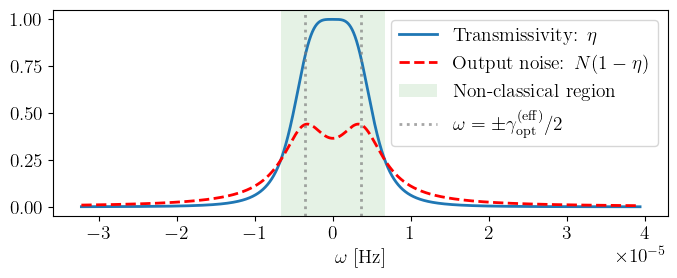

In [98]:
mech_frequency = 0.03 # Mechanical frequency in Hz
quality_factor = 1E14
omega_b = 2 * np.pi * mech_frequency
lamda_num = w_G**2 / omega_b
gamma_num = omega_b / quality_factor
kappa_num = 0.1 * omega_b
mechanical_photon_number = 1 / (np.exp(omega_b / w_T) - 1)
g_num = 1 * (np.sqrt(kappa_num) * (4 * (lamda_num**2)  +  gamma_num**2)**(1/4)) / 2

linewidth = gamma_num + np.sqrt(gamma_num**2 + 4*lamda_num**2)

# Assignments of numerical parameters to SymPy variables
params = {
    kappa: kappa_num,
    gamma: gamma_num,
    g: g_num,
    lam: lamda_num,
    N_T: mechanical_photon_number,
}

noise_omega = noise.subs(params)
transmissivity_omega = transmissivity.subs(params)

# Convert to 1-D NumPy function
noise_omega_np = sp.lambdify(omega, noise_omega)
transmissivity_omega_np = sp.lambdify(omega, transmissivity_omega)


# Plotting style settings
plt.rcParams.update({
    "text.usetex": True,
})
plt.rcParams.update({"font.family": "serif", "font.size": 14})


fig = plt.figure(figsize=(7, 3))

omegas = np.linspace(-9 * params[lam], 11 *params[lam], 5000)
plt.plot(omegas, transmissivity_omega_np(omegas), label="Transmissivity: $\eta$", linewidth=2)
plt.plot(omegas, noise_omega_np(omegas), label="Output noise: $N (1- \eta)$", color="red", linestyle="dashed", linewidth=2)

# Find non-classicality crossing point
w_cross = None
for w, t, n, in zip(omegas, transmissivity_omega_np(omegas), noise_omega_np(omegas)):
    if (w_cross is None) and t > n:
        w_cross = w
        
# Highlight non-classicality region
if w_cross:        
    plt.axvspan(-w_cross, w_cross, color='green', alpha=0.1, label="Non-classical region", linewidth=0)

# Highlight GIT bandwidth
plt.axvline(-linewidth/2, color='gray', alpha=0.7, linestyle="dotted", label="$\omega=\\pm \gamma_{\\rm opt}^{\\rm (eff)}/2$", linewidth=2)
plt.axvline(linewidth/2, color='gray', alpha=0.7, linestyle="dotted", linewidth=2)


# plt.xlabel("$\\omega - (\\omega_{\\rm pump}+ \omega_{\\rm B}) \; [{\\rm Hz}]$")
plt.xlabel("$\\omega \; [{\\rm Hz}]$")
plt.legend()

plt.tight_layout()
fig.savefig(fname="GIT.pdf", dpi=300, bbox_inches='tight')

Physical parameters used in this plot:

In [51]:
params

{kappa: 0.01884955592153876,
 gamma: 1.8849555921538756e-15,
 g: 0.00018373038095479424,
 lambda: 3.5817133333333332e-06,
 N_{T}: 694448563.1964276}

## Refs

[1] M. Horodecki, P. W. Shor, and M. B. Ruskai, “Entanglement breaking channels,” Rev. Math. Phys. 15, 629–641 (2003). 

[2] S. Khatri, M. M. Wilde, Principles of quantum communication theory: A modern approach, arXiv:2011.04672 (2020).

[3] A. S. Holevo, "Entanglement-breaking channels in infinite dimensions." Problems of Information Transmission 44 (2008).

[4] K. Farzad, M. Fanizza, and V. Giovannetti, "Low-ground/High ground capacity regions analysis for Bosonic Gaussian Channels.", arXiv:2306.16350 (2023).

[5] F. A. Mele, L. Lami, and V. Giovannetti, "Maximum tolerable excess noise in CV-QKD and improved lower bound on two-way capacities." arXiv preprint arXiv:2303.12867 (2023).